In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32) 
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

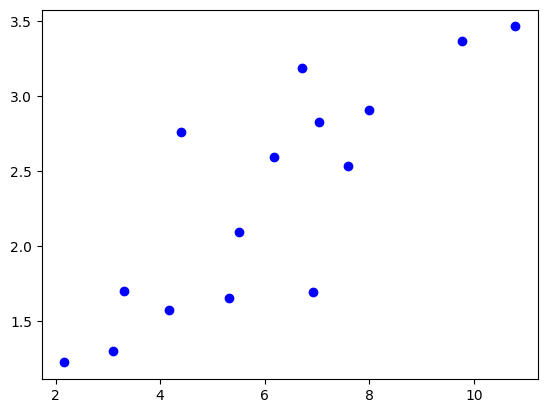

In [6]:
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo')
plt.show()

In [7]:
w = torch.tensor([-1.],requires_grad=True)
b = torch.tensor([0.], requires_grad=True)

def linear_model(x):
    return x * w + b


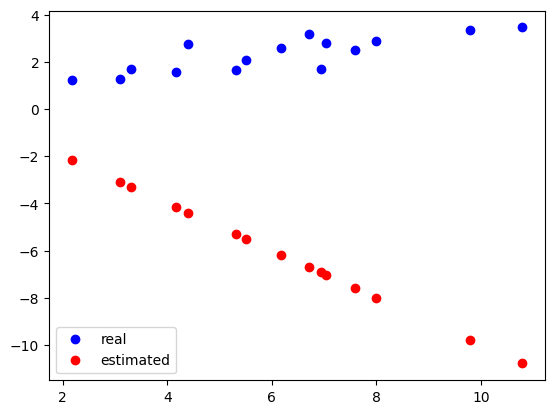

In [8]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), "bo", label="real")
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label="estimated")
plt.legend()
plt.show()

In [9]:
def get_loss(y_, y):
    return torch.mean((y_-y_train) ** 2)

In [11]:
# Train 10 iteration
lr = 1e-2
for e in range(10):
    y_ = linear_model(x_train)

    # Compute loss
    loss = get_loss(y_, y_train)
    loss.backward()

    # 手動更新參數
    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data
    print('epoch: {},loss: {}'.format(e, loss))

    # reset the grad to zero
    w.grad.zero_()
    b.grad.zero_()

epoch: 0,loss: 79.35061645507812
epoch: 1,loss: 1.6737390756607056
epoch: 2,loss: 0.23599520325660706
epoch: 3,loss: 0.20918604731559753
epoch: 4,loss: 0.20848968625068665
epoch: 5,loss: 0.2082776129245758
epoch: 6,loss: 0.20807550847530365
epoch: 7,loss: 0.2078746259212494
epoch: 8,loss: 0.2076748162508011
epoch: 9,loss: 0.2074759602546692


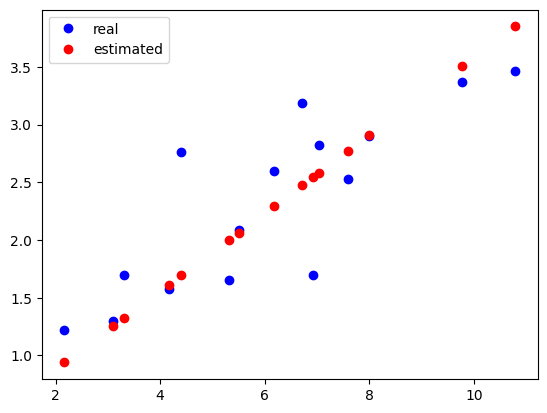

In [12]:
# plot estimate result after train
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()